In [1]:
from sansdata import *

# Implementation of reduction from scratch without Mantid
Purpose: understanding what needs to be implemented in Mantid as this has some additional overhead (both conceptual and in terms of code).

In [10]:
sample = SansData(f"data/memb_BS_Q2_6_0Ang.mpa")
transmission = SansData(f"data/memb_no_BS_Q2_Boron_8_5Ang.mpa")

# sample = SansData(f"data/glassyC_BS_Q2_6_0Ang.mpa")
# transmission = SansData(f"data/glassyC_no_BS_Q2_Boron_8_5Ang.mpa")

background = SansData(f"data/09_07_24_backG_3600s_reactor_on_Fish_on.mpa")
direct = SansData(f"data/empty_no_BS_Q2_Boron.mpa")
relative_pixel_efficiency = np.loadtxt('pixel-efficiency.txt.gz')

=== Loading RIDSANS measurement file: data/memb_BS_Q2_6_0Ang.mpa ===
Detector to sample distance: 8.748 m
lambda_0: 5.998 Å
Sample: memb_BS_Q2_6_0Ang
	Measurement time: 600 s
	Total counts: 8923416
	Average detector intensity: 1.487e+04 counts/s
=== Loading RIDSANS measurement file: data/memb_no_BS_Q2_Boron_8_5Ang.mpa ===
No header was found, assuming this is a background measurement
	Measurement time: 60.02 s
	Total counts: 914865
	Average detector intensity: 1.524e+04 counts/s
=== Loading RIDSANS measurement file: data/09_07_24_backG_3600s_reactor_on_Fish_on.mpa ===
No header was found, assuming this is a background measurement
	Measurement time: 3600 s
	Total counts: 323377
	Average detector intensity: 89.83 counts/s
=== Loading RIDSANS measurement file: data/empty_no_BS_Q2_Boron.mpa ===
No header was found, assuming this is a background measurement
	Measurement time: 60.02 s
	Total counts: 952696
	Average detector intensity: 1.587e+04 counts/s


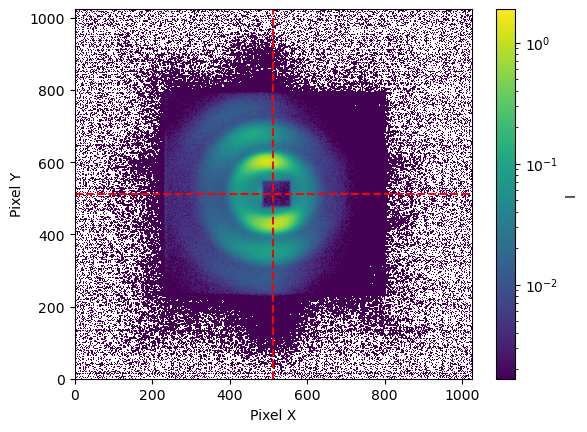

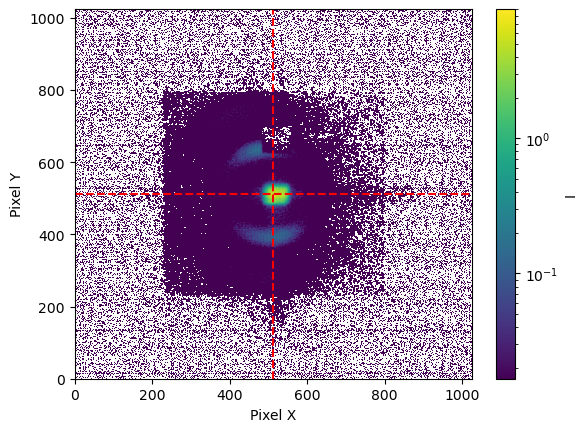

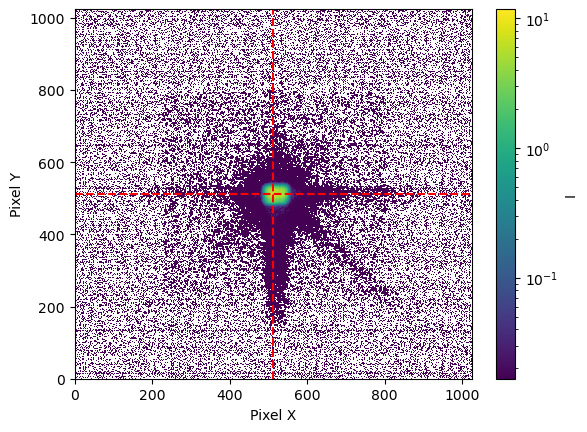

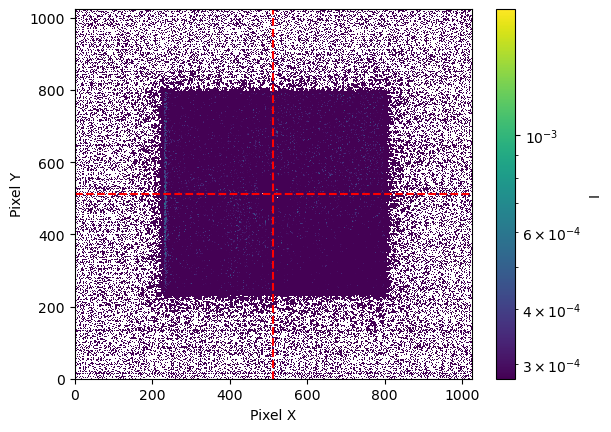

In [11]:
sample.plot_2d(True)
transmission.plot_2d(True)
direct.plot_2d(True)
background.plot_2d(True)

In [12]:
relative_pixel_efficiency[relative_pixel_efficiency == 0] = 1

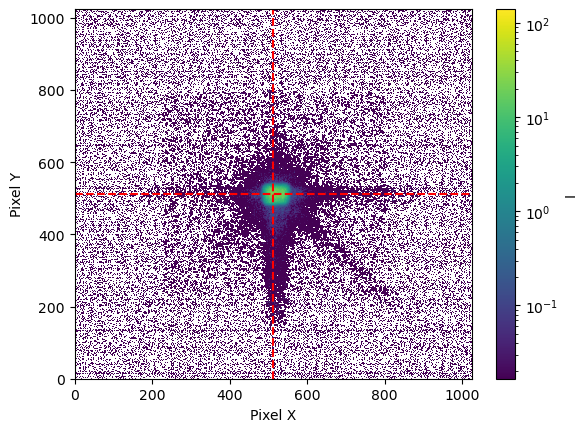

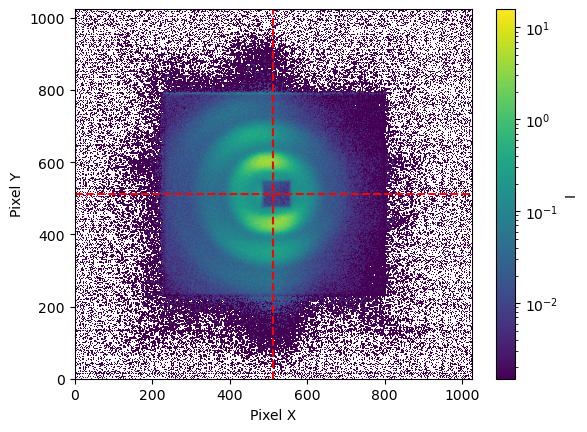

In [13]:
# TODO: consider error in efficiency map...
I_direct = direct.I/relative_pixel_efficiency
dI_direct = direct.dI/relative_pixel_efficiency
I_sample = sample.I/relative_pixel_efficiency
dI_sample = sample.dI/relative_pixel_efficiency
plot_I(I_direct)
plot_I(I_sample)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


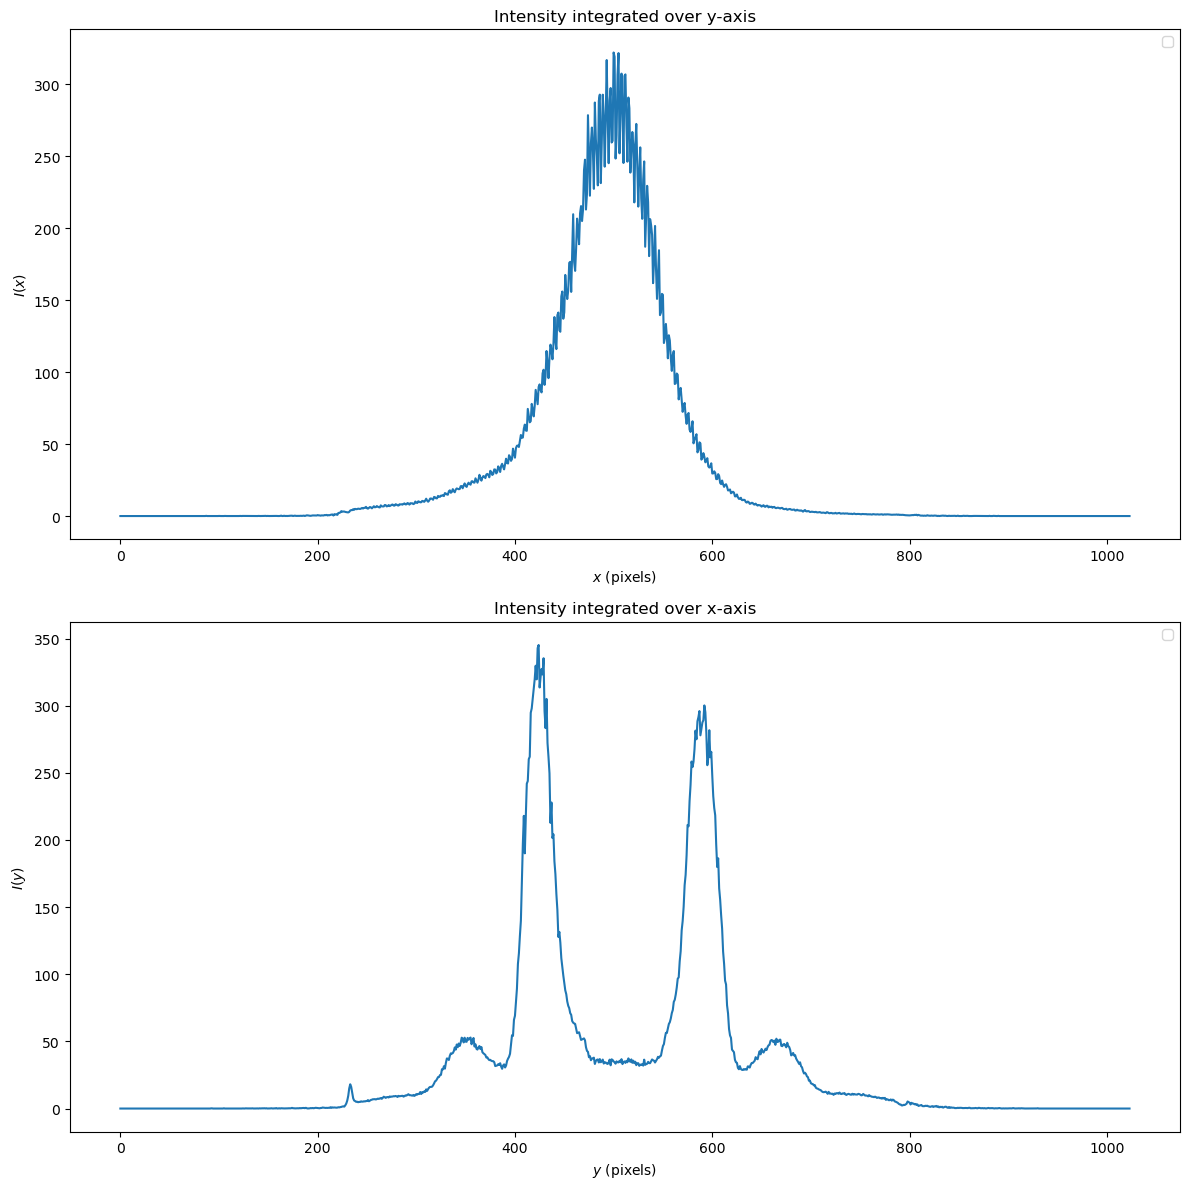

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


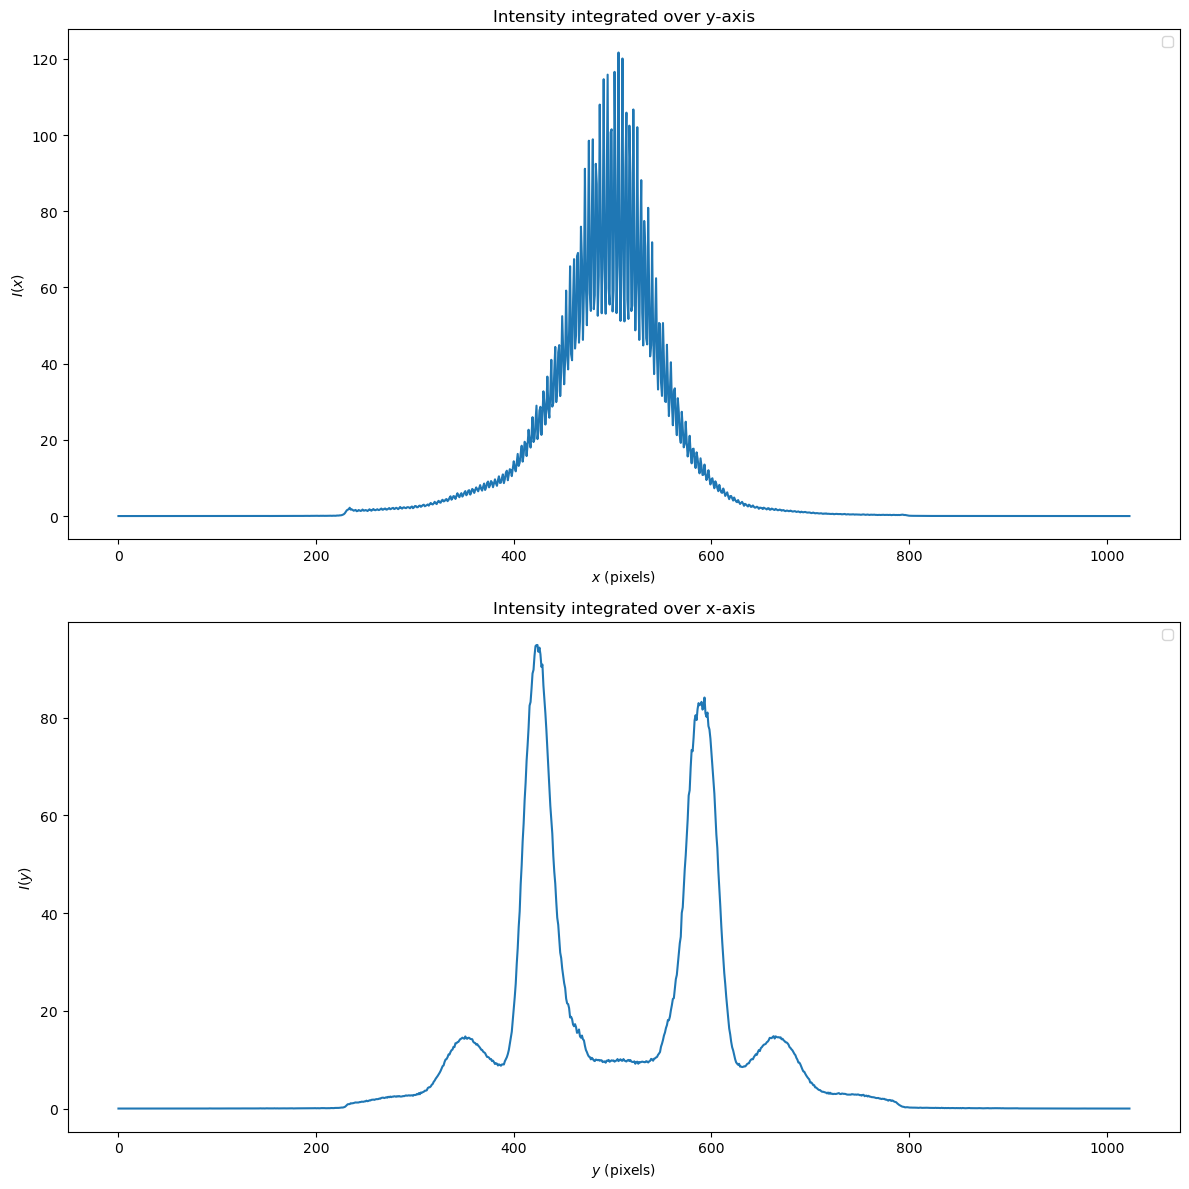

In [14]:
plot_projections(I_sample)
plot_projections(sample.I)

In [5]:
T_s = sample.I_0 / direct.I_0
T_c = 1
T_s

0.9370188048393281

In [ ]:
I_corrected = 1/T_s * (sample.I - background.I)
# Neglect dT_s
dI_corrected = np.sqrt(sample.dI**2 + background.dI**2) / T_s
I_corrected

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])